# 2.2 Frequentist Optimality

<small>Thanks to Francisco Fonseca and Trevor Hastie for uncovering and correcting an error in the book, which made it possible to complete this section.</small>

### Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

For ten independent samples from each normal distribution, with means $\mu_0 = 0$, $\mu_1 = 0.5$ and variance $\sigma_0^2 = \sigma_1^2 = 1$, we have

$$
\begin{aligned}
\log L(x) &= \log\left(f_1(x) / f_0(x)\right) \newline
&= \log \frac{\prod_{i=1}^{10}\frac{1}{\sqrt{2\pi}}\exp\left(-(x_i - 0.5)^2 / 2\right)}{\prod_{i=1}^{10} \frac{1}{\sqrt{2\pi}}\exp\left(-x_i^2 / 2\right)} \newline
&= \log \frac{\prod_{i=1}^{10} \exp\left(-(x_i - 0.5)^2 / 2\right)}{\prod_{i=1}^{10} \exp\left(-x_i^2 / 2\right)} \newline
&= \log \frac{\exp\left(-\sum_{i=1}^{10}(x_i - 0.5)^2 / 2\right)}{ \exp\left(-\sum_{i=1}^{10}x_i^2 / 2\right)} \newline
&= \log \exp\left(-\sum_{i=1}^{10}(x_i - 0.5)^2 / 2\right) - \log \exp\left(-\sum_{i=1}^{10}x_i^2 / 2\right) \newline
&= -\sum_{i=1}^{10}(x_i - 0.5)^2 / 2 + \sum_{i=1}^{10}x_i^2 / 2 \newline
&= \frac{1}{2} \left( -\sum_{i=1}^{10}x_i^2 + \sum_{i=1}^{10} x_i - \sum_{i=1}^{10} 0.25 + \sum_{i=1}^{10}x_i^2 \right) \newline
&= \frac{1}{2} \sum_{i=1}^{10} x_i - \frac{5}{4} \newline
&= \frac{5}{10} \sum_{i=1}^{10} x_i - \frac{5}{4} \newline
&= 5 \cdot \overline{x} - \frac{5}{4} \newline
\end{aligned}
$$

Then the testing rule is

$$
t_c(x) = \left\{ 
\begin{aligned}
1 & \quad\text{if}\quad 5 \cdot \overline{x} - \frac{5}{4} \geq c \\
0 & \quad\text{if}\quad 5 \cdot \overline{x} - \frac{5}{4} < c
\end{aligned}
\right.
$$

which is

$$
t_c(x) = \left\{ 
\begin{aligned}
1 & \quad\text{if}\quad \overline{x} \geq c/5 + 1/4 \\
0 & \quad\text{if}\quad \overline{x} < c/5 + 1/4
\end{aligned}
\right.
$$

Then with

$$
\begin{aligned}
\alpha &= \Pr_{f_0}\left\{t(x) = 1\right\} \\
\beta &= \Pr_{f_1}\left\{t(x) = 0\right\}
\end{aligned}
$$

we have

$$
\begin{aligned}
\alpha &= \Pr_{f_0}\left\{\overline{x} \geq 0.2 c + 0.25 \right\} \\
\beta &= \Pr_{f_1}\left\{\overline{x} < 0.2 c + 0.25 \right\}
\end{aligned}
$$

For $\alpha$ and $\beta$ we need to pull values from the CDFs of the distributions on sample means.

In [3]:
m0 = norm(loc=0, scale=(1 / np.sqrt(10)))
m1 = norm(loc=0.5, scale=(1 / np.sqrt(10)))

Values for the plot

In [4]:
# each cutoff is 0.2 * c + 0.25
cutoffs = np.arange(0.9, -0.95, -0.1)
sparse_cutoffs = np.arange(0.8, -0.5, -0.2)

In [5]:
a_vals = [1 - m0.cdf(cutoff) for cutoff in cutoffs]
b_vals = [m1.cdf(cutoff) for cutoff in cutoffs]

In [6]:
sparse_a_vals = [1 - m0.cdf(cutoff) for cutoff in sparse_cutoffs]
sparse_b_vals = [m1.cdf(cutoff) for cutoff in sparse_cutoffs]

### Figure 2.2

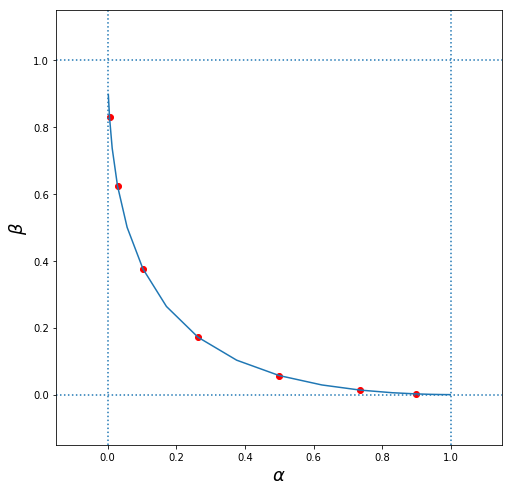

In [7]:
fix, ax = plt.subplots(figsize=(8, 8))

ax.axvline(0, linestyle=":")
ax.axvline(1, linestyle=":")
ax.axhline(0, linestyle=":")
ax.axhline(1, linestyle=":")

ax.plot(a_vals, b_vals)
ax.scatter(sparse_a_vals, sparse_b_vals, c="r")

ax.set_xlim(-0.15, 1.15)
ax.set_ylim(-0.15, 1.15)

ax.set_xlabel("$\\alpha$", size=18)
ax.set_ylabel("$\\beta$", size=18);